In [8]:
import pandas as pd

In [9]:
#Return initial dataset from .xlsx
table = pd.read_excel('Hazop_table_202210260248.xlsx')

In [10]:
#Checking top 5
table.head(5)

,ID_Hazop_Tbl,Npp,ID_Uzel_word,Npp_tab,Prichin,Posledstv_Zd,Posledstv_Ecol,Posledstv_Econ,Me_zashit,Recommend,Otvetstv,Uroven,Risk,Verojatn,Posledstv,UrPosledstv
0,682,1,294.0,NaN,Gate valve UV-6001 failure (valve closed),None,None,"HCGO flow stop to heat exchanger E-101-1/2, fl...",1. Gate valve UV-6001 position alarm_x000D_\n2...,NaN,NaN,1.0,3.0,3,E,0.0
1,683,2,294.0,NaN,Gate valve UV-6002 failure (valve closed),None,None,SR VGO flow stop to inlet of heat exchanger E-...,1. Gate valve UV-6002 position alarm_x000D_\n2...,NaN,NaN,1.0,3.0,3,E,0.0
2,684,3,294.0,NaN,Gate valve UV-6003 failure (valve closed),Significant decrease of Unit productivity (sto...,None,SR VGO main flow stop to inlet of heat exchang...,1. Gate valve UV-6002 position alarm_x000D_\n2...,NaN,NaN,1.0,8.0,3,D,1.0
3,685,4,294.0,NaN,Flow control loop FIC-3110 failure (valve FV-3...,None,None,"HCGO flow stop to heat exchanger E-101-1/2, fl...",1. Alarm of minimum level in V-101 via device ...,NaN,NaN,1.0,4.0,4,E,0.0
4,686,5,294.0,NaN,Flow control loop FIC-3111A failure (valve FV-...,None,None,SR VGO flow stop to inlet of heat exchanger E-...,1. Alarm of minimum level in V-101 via device ...,NaN,NaN,1.0,4.0,4,E,0.0


In [11]:
#Checking values from column with severity levels
table['Posledstv'].values

array(['E', 'E', 'D', ..., 'S4', 'S4', 'S3'], dtype=object)

In [12]:
#Selection of specific level names (S1-S5 - linked to the main object of research)
S_values = ['S1', 'S2', 'S3', 'S4', 'S5']
samples = table[table['Posledstv'].isin(S_values)]
#Checking top 5
samples.head(5)

,ID_Hazop_Tbl,Npp,ID_Uzel_word,Npp_tab,Prichin,Posledstv_Zd,Posledstv_Ecol,Posledstv_Econ,Me_zashit,Recommend,Otvetstv,Uroven,Risk,Verojatn,Posledstv,UrPosledstv
6,688,7,294.0,NaN,Flow control loop FIC-3113 failure (valve FV-3...,None,None,Heat medium flow stop to exchanger E-101-1/2 b...,1. Alarm of maximum pressure drop on filter F-...,NaN,NaN,1.0,4.0,L4,S1,0.0
7,689,8,294.0,NaN,Gate valve UV-6101 failure (valve closed),Pump P-101A (P-101B) breakdown; release of haz...,"gas contamination, combustion products contami...","Flow stop to feed drum V-101, stop of SR VGO a...",1. Gate valve UV-6101 position alarm_x000D_\n2...,NaN,NaN,2.0,13.0,L3,S3,2.0
8,690,9,294.0,NaN,Pump P-101A (P-101B) trip,Heater H-101 coils burnout; fire in heater H-1...,"gas contamination, combustion products contami...","Pumping stop from feed drum V-101, level incre...",1. Alarm of pump P-101A (P-101B) operation_x00...,NaN,NaN,3.0,22.0,L2,S5,4.0
9,691,10,294.0,NaN,Gate valve UV-6137 failure (valve closed),Heater H-101 coils burnout; fire in heater H-1...,"gas contamination, combustion products contami...","Pumping stop from feed drum V-101, level incre...",1. Gate valve UV-6137 position alarm_x000D_\n2...,Review a necessity of check valve installation...,DL E&C,3.0,22.0,L2,S5,4.0
10,692,11,294.0,NaN,Gate valve UV-6138 failure (valve closed),Heater H-101 coils burnout; fire in heater H-1...,"gas contamination, combustion products contami...","Pumping stop from feed drum V-101, level incre...",1. Gate valve UV-6138 position alarm_x000D_\n2...,NaN,NaN,3.0,22.0,L2,S5,4.0


In [13]:
#libs import
import torch
import torch.nn as nn
import numpy as np

from warnings import filterwarnings

filterwarnings('ignore')

In [14]:
#import AutoTokenizer & Bert-kind models
from transformers import AutoTokenizer
from transformers import BertModel  # https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel
from transformers import RobertaModel  # https://huggingface.co/docs/transformers/model_doc/roberta#transformers.RobertaModel
from transformers import DistilBertModel  # https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.DistilBertModel


def get_model(model_name):
    assert model_name in ['bert', 'roberta', 'distilbert']
    
    checkpoint_names = {
        'bert': 'bert-base-cased',  # https://huggingface.co/bert-base-cased
        'roberta': 'roberta-base',  # https://huggingface.co/roberta-base
        'distilbert': 'distilbert-base-cased'  # https://huggingface.co/distilbert-base-cased
    }
    
    model_classes = {
        'bert': BertModel,
        'roberta': RobertaModel,
        'distilbert': DistilBertModel
    }
    
    return AutoTokenizer.from_pretrained(checkpoint_names[model_name]), model_classes[model_name].from_pretrained(checkpoint_names[model_name])

In [15]:
#Select BERT model for the study
tokenizer, model = get_model('bert')

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
#What's inside the tokenizer - just for information
tokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [17]:
#DataCollator
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [18]:
#Device selection. Works well enough with the CPU 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [19]:
#Load model to the device
model = model.to(device)

# Data preprocessing /// Подготовка данных

In [20]:
#Select two columns - consequence description and severity levels
samples = samples[['Posledstv_Zd', 'Posledstv']].dropna().reset_index(drop=True)
samples.head()

,Posledstv_Zd,Posledstv
0,None,S1
1,Pump P-101A (P-101B) breakdown; release of haz...,S3
2,Heater H-101 coils burnout; fire in heater H-1...,S5
3,Heater H-101 coils burnout; fire in heater H-1...,S5
4,Heater H-101 coils burnout; fire in heater H-1...,S5


In [21]:
#Replace string values to int values
samples['Posledstv'] = samples['Posledstv'].replace(S_values, [1, 2, 3, 4, 5])

In [22]:
#samples2 used just as reserve var
samples2 = samples
#Checking edited column
samples2.head(5)

,Posledstv_Zd,Posledstv
0,None,1
1,Pump P-101A (P-101B) breakdown; release of haz...,3
2,Heater H-101 coils burnout; fire in heater H-1...,5
3,Heater H-101 coils burnout; fire in heater H-1...,5
4,Heater H-101 coils burnout; fire in heater H-1...,5


In [23]:
#Divide column to the distinct class columns (OHE-kinda)
severity_col = ['s_1', 's_2', 's_3', 's_4', 's_5']
severity_col

['s_1', 's_2', 's_3', 's_4', 's_5']

In [24]:
#OHE
ohe = pd.get_dummies(samples2['Posledstv'], prefix='s', drop_first=False)
samples2 = pd.concat((samples.drop('Posledstv', axis=1), ohe), axis=1)

In [25]:
#Checking top 5
samples2.head(5)

,Posledstv_Zd,s_1,s_2,s_3,s_4,s_5
0,None,1,0,0,0,0
1,Pump P-101A (P-101B) breakdown; release of haz...,0,0,1,0,0
2,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1
3,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1
4,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1


In [26]:
#Create labels column, fill with zeros
samples2['labels'] = 0
samples2.head(5)

,Posledstv_Zd,s_1,s_2,s_3,s_4,s_5,labels
0,None,1,0,0,0,0,0
1,Pump P-101A (P-101B) breakdown; release of haz...,0,0,1,0,0,0
2,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1,0
3,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1,0
4,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1,0


In [27]:
#Group values from S1-S5 column to the list and save in 'labels' column
samples2['labels'] = samples2[['s_1', 's_2', 's_3', 's_4', 's_5']].values.tolist()

In [28]:
#Checking top 5
samples2.head(5)

,Posledstv_Zd,s_1,s_2,s_3,s_4,s_5,labels
0,None,1,0,0,0,0,"[1, 0, 0, 0, 0]"
1,Pump P-101A (P-101B) breakdown; release of haz...,0,0,1,0,0,"[0, 0, 1, 0, 0]"
2,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1,"[0, 0, 0, 0, 1]"
3,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1,"[0, 0, 0, 0, 1]"
4,Heater H-101 coils burnout; fire in heater H-1...,0,0,0,0,1,"[0, 0, 0, 0, 1]"


In [29]:
#Drop severity levels column, save only 'labels'
samples2 = samples2.drop(severity_col, axis=1)
samples2.head(5)

,Posledstv_Zd,labels
0,None,"[1, 0, 0, 0, 0]"
1,Pump P-101A (P-101B) breakdown; release of haz...,"[0, 0, 1, 0, 0]"
2,Heater H-101 coils burnout; fire in heater H-1...,"[0, 0, 0, 0, 1]"
3,Heater H-101 coils burnout; fire in heater H-1...,"[0, 0, 0, 0, 1]"
4,Heater H-101 coils burnout; fire in heater H-1...,"[0, 0, 0, 0, 1]"


In [30]:
#Create dataset object from samples2 table
from datasets import Dataset
dataset = Dataset.from_pandas(samples2)
dataset = dataset.train_test_split(test_size=0.3) #test_size=0.3 should be good enough

In [31]:
#Just for info - what's inside the dataset object
dataset

DatasetDict({
    train: Dataset({
        features: ['Posledstv_Zd', 'labels'],
        num_rows: 665
    })
    test: Dataset({
        features: ['Posledstv_Zd', 'labels'],
        num_rows: 286
    })
})

In [32]:
#Dataloader & tokenization staff
from torch.utils.data import DataLoader

def tokenization(example):
    return tokenizer.batch_encode_plus(example['Posledstv_Zd'], add_special_tokens=True, return_token_type_ids=False, truncation=True)

train_dataset = dataset['train'].map(tokenization, batched=True)
test_dataset = dataset['test'].map(tokenization, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", 'labels'])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", 'labels'])

train_loader = DataLoader(train_dataset, batch_size=64, collate_fn=data_collator, pin_memory=True, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, collate_fn=data_collator, pin_memory=True, shuffle=False)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [33]:
#def to get embeddings for train & test
from tqdm import tqdm

@torch.inference_mode()
def get_embeddings_labels(model, loader):
    model.eval()
    
    total_embeddings = []
    labels = []
    
    
    for batch in tqdm(loader):
        labels.append(batch['labels'].unsqueeze(1))
        
        batch = {key: batch[key].to(device) for key in ['attention_mask', 'input_ids']}
        #print(batch)

        embeddings = model(**batch)['last_hidden_state'][:, 0, :]
        total_embeddings.append(embeddings.cpu())


    return torch.cat(total_embeddings, dim=0), torch.cat(labels, dim=0).to(torch.float32)

In [34]:
#Get embeddings for train
train_embeddings, train_labels = get_embeddings_labels(model, train_loader)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.43it/s]


In [35]:
#Get embeddings for test
test_embeddings, test_labels = get_embeddings_labels(model, test_loader)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.94it/s]


In [36]:
#Check shapes for train
train_embeddings.shape, train_labels.shape

(torch.Size([665, 768]), torch.Size([665, 1, 5]))

In [37]:
#Check shapes for test
test_embeddings.shape, test_labels.shape

(torch.Size([286, 768]), torch.Size([286, 1, 5]))

In [38]:
#train_embeddings[70]

In [39]:
#Prep embeddings for the next nn model
from torch.utils.data import TensorDataset
from torch.utils.data import random_split

dataset = TensorDataset(torch.cat([train_embeddings, test_embeddings], dim=0), torch.cat([train_labels, test_labels], dim=0))
train_dataset, test_dataset = random_split(dataset, (int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8)))

train_loader = DataLoader(train_dataset, batch_size=128, pin_memory=True, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=128, pin_memory=True, shuffle=False)

# Model for multi-label classification // Модель для многотемной классификации

In [40]:
#Setting up the nn model - 3 layers and dropout
from torch.optim import Adam

little_model = nn.Sequential(
    nn.Linear(768, 768),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(768, 5)
)

little_model = little_model.to(device)
#Optimizer and loss-function
optimizer = Adam(little_model.parameters(), lr=5e-3) 
loss_fn = nn.BCEWithLogitsLoss()

In [41]:
#Checking the model
little_model

Sequential(
  (0): Linear(in_features=768, out_features=768, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=768, out_features=5, bias=True)
)

In [42]:
#Train the model
def train(model):
    model.train()
    
    total=0
    correct=0
    train_loss = 0
    train_accuracy = 0

    for x, y in tqdm(train_loader, desc='Train'):
        x, y = x.to(device), y.to(device)
        y=y.squeeze(1)

        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y.squeeze(1))

        train_loss += loss.item()

        rounded_preds = torch.round(torch.sigmoid(output))
    
        pos = torch.argmax(rounded_preds, 1) 
        y_true = torch.argmax(y, 1)
        total += y.size(0)
        correct += (pos == y_true).sum()
        ###

        loss.backward()

        optimizer.step()

    train_loss /= len(train_loader)
    train_accuracy =  correct / total

    return train_loss, train_accuracy

In [43]:
#Evaluate the model (without traing)
@torch.inference_mode()
def evaluate(model, loader):
    model.eval()
    
    total=0
    correct=0
    total_loss = 0
    total_accuracy = 0

    for x, y in tqdm(loader, desc='Evaluation'):
        x, y = x.to(device), y.to(device)

        y=y.squeeze(1)
        output = model(x)

        loss = loss_fn(output, y.squeeze(1))

        total_loss += loss.item()
        
        rounded_preds = torch.round(torch.sigmoid(output))
    
        pos = torch.argmax(rounded_preds, 1) 
        y_true = torch.argmax(y, 1)
        total += y.size(0)
        correct += (pos == y_true).sum()

    total_loss /= len(loader)
    total_accuracy =  correct / total
    
    return total_loss, total_accuracy

In [44]:
#Plotting stats
import matplotlib.pyplot as plt
from IPython.display import clear_output


def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    train_accuracy: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' функция потерь')

    plt.plot(train_loss, label='Функция потерь (тренировочные)') #Train loss
    plt.plot(valid_loss, label='Функция потерь (тестовые)') #Valid loss
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' точность')
    
    plt.plot(train_accuracy, label='Точность (тренировочные)') #Train accuracy
    plt.plot(valid_accuracy, label='Точность (тестовые)') #Valid accuracy
    plt.legend()
    plt.grid()

    plt.show()
    print(train_accuracy[-1], valid_accuracy[-1])

In [45]:
#Cycle for the model training
def whole_train_valid_cycle(model, num_epochs, title):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model)
        valid_loss, valid_accuracy = evaluate(model, valid_loader)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output()

        plot_stats(
            train_loss_history, valid_loss_history,
            train_accuracy_history, valid_accuracy_history,
            title
        )

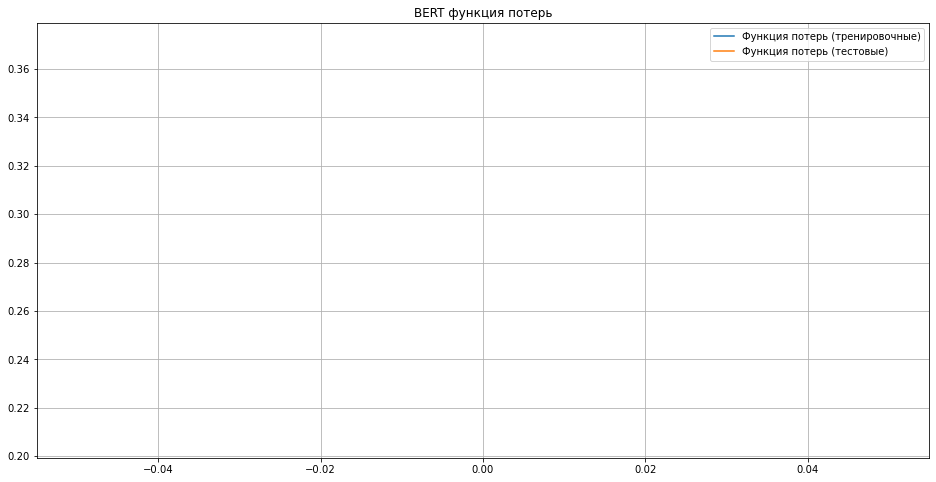

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

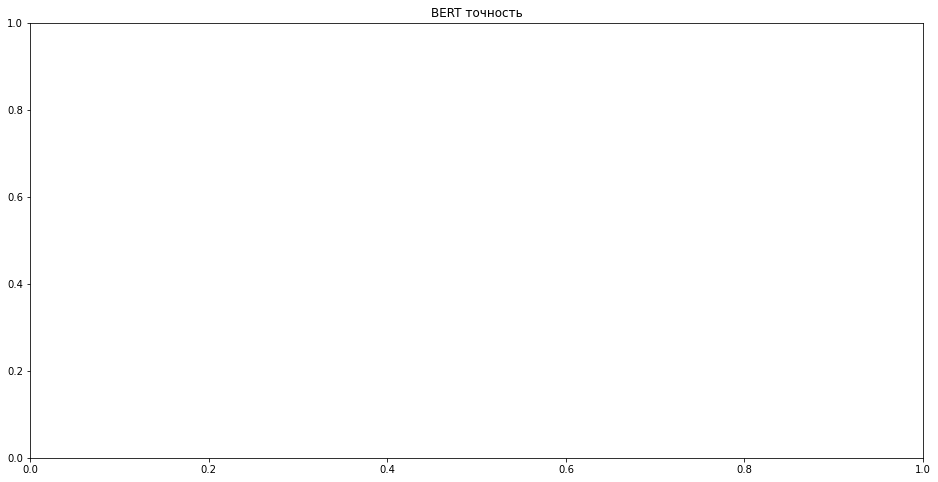

In [46]:
#Initiate model training
whole_train_valid_cycle(little_model, 20, 'BERT')

In [ ]:
#Label prediction - just to check if the prediction is working well
@torch.inference_mode() #декократор для отключения подсчета градиентов
def predict(model: nn.Module, loader: DataLoader, device: torch.device):
    model.eval()
    
    preds_hist = []
    

    for x, y in tqdm(loader):
        x, y = x.to(device), y.to(device)
        
        preds = model(x)

        rounded_preds = torch.sigmoid(preds) #torch.round()
    
        preds_class = torch.argmax(rounded_preds, 1) 
        
        preds_hist.append(preds_class)

    preds_hist = torch.cat(preds_hist)
    
    return preds_hist

In [ ]:
#check if the prediction is working well
predict(little_model, valid_loader, device)

In [ ]:
#One-sample prediction
@torch.inference_mode() #декократор для отключения подсчета градиентов
def predict_sample(model: nn.Module, loader, device: torch.device):

    model.eval()
    
    preds_hist = []
    
    for x in loader:
        x  = x.to(device).unsqueeze(1)
        x = torch.transpose(x, 0, 1)
    
        #print(x.shape)
        #print(x)
        
        preds = model(x)
        print(preds)

        rounded_preds = torch.sigmoid(preds) #torch.round()
        print(rounded_preds)
    
        preds_class = torch.argmax(rounded_preds, 1) 
        print(preds_class)
    
        preds_hist.append(preds_class)
    
    preds_hist = torch.cat(preds_hist)
        
    return preds_hist

In [ ]:
@torch.inference_mode()
def take_sample(test_comment):
    
    model.eval()
    
    total_embeddings = []
    
    sample_encoding = tokenizer.batch_encode_plus([test_comment], 
                                       add_special_tokens=True, 
                                       return_token_type_ids=False, 
                                       truncation=True)
    
    sample_encoding['input_ids'] = torch.tensor(sample_encoding['input_ids'])
    sample_encoding['attention_mask'] = torch.tensor(sample_encoding['attention_mask'])
    embeddings = model(**sample_encoding)['last_hidden_state'][:, 0, :]
    total_embeddings.append(embeddings.cpu())
    res = torch.cat(total_embeddings, dim=0)
    
    return res
#УСПЕХ!

In [ ]:
#Def to check for new entries
def consequences_input(cons: str):
    test = take_sample(cons)
    predict_sample(little_model, test, device)
    
#Results format:
#Class preds
#Corrected class preds (sigmoid)
#Class tensor

In [ ]:
#Test 1
consequences_input('Separator breakdown, damage to the nearby equipment')

In [ ]:
#Test 2
consequences_input('Decrease temperature in cooler E-103')

In [ ]:
#Test 3
consequences_input('None')

In [ ]:
#Test 4
consequences_input('Heater H-101 coils burnout; fire in heater H-101.')

In [ ]:
#Test 5
consequences_input('Compressor C-101B breakdown; release of hazardous materials, explosion, fire, personnel injuries, damage to nearby equipment')

In [ ]:
#Test 6
consequences_input('pump P-104 breakdown, release of hazarious materials')